In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import h5py as h5
import os
import glob
from os import walk
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.gridspec import GridSpec
from IPython.display import display, clear_output
from labexp import experiments
from mpl_toolkits.axes_grid1 import make_axes_locatable,ImageGrid
from mpl_toolkits.axes_grid1 import AxesGrid
from matplotlib.gridspec import GridSpec

In [2]:
def createImAmpl(datexprAmp):
    intVar=np.zeros([45,6])
    for j in np.linspace(0,44,45):
        dex=pd.Series(datexprAmp[int(j)])
        leng=np.size(dex)
        ind=0; flag=True; i=0
        while flag:
            if dex[i]==0:
                ind=i
                flag=False
            if i==leng-1:
                flag=False
            i+=1
        if ind!=0:
            ndex=dex[2:int(ind)]
        else:
            ndex=dex[2:]
        
        nlengdex=np.size(ndex)
        ndex=pd.concat([ndex,ndex[nlengdex-100:nlengdex-50]],ignore_index=True)
        ndex=(ndex-ndex.mean())/(ndex.max()+ndex.min())
        dat=ndex.diff()
        tt=dat.nlargest(n=6)
        tt=tt.sort_index()
        numtt=tt.to_numpy()
        intVar[int(j),:]=numtt
        
    return intVar

def figdat(arr,cmapS):
    fig = plt.figure(figsize=(13, 7))
    gs = GridSpec(1, 2, figure=fig,wspace=0.2,width_ratios=[2,1])
    
    ax = fig.add_subplot(gs[0, 0])
    ax2 =fig.add_subplot(gs[0, 1])
    
    npix1=0
    npix2=3
    
    ax.set_xlabel(" $x$ $(\mu m)$")
    ax.set_xticks(np.arange(0,44,4))
    ax.set_xticklabels(np.arange(0,88,8))
    ax.set_ylabel(" $y$ $(\mu m)$")
    ax.set_yticks(np.arange(0,4,2))
    ax.set_yticklabels(np.arange(0,8,4))
    ax.imshow(arr,cmap=cmapS,aspect='auto',interpolation='gaussian')
    ax.plot([0,45],[npix1,npix1],'r')
    ax.plot([0,45],[npix2,npix2],'b')
    
    ax2.set_xlabel(" $x$ $(\mu m)$")
    ax2.set_xticks(np.arange(0,45,4))
    ax2.set_xticklabels(np.arange(0,90,8))
    ax2.set_ylabel(" $distance ~$ $(n m)$")

    ax2.plot(arr.T[:,npix1],'r')
    ax2.plot(arr.T[:,npix2],'b')
    
    plt.show()

In [3]:
exp = experiments(1,'nano','nsom','grating_InP')

|  No. Dir  | Name Dir                                         |  No. files  |
|-----------|--------------------------------------------------|-------------|
|     0     | nano/grating_InP/exp_2022-04/exp_2022_15_04_nsom |      2      |
|     1     | nano/grating_InP/exp_2022-04/exp_2022_18_04_nsom |      2      |
|     2     | nano/grating_InP/exp_2022-04/exp_2022_19_04_nsom |      2      |
|     3     | nano/grating_InP/exp_2022-04/exp_2022_20_04_nsom |      2      |
|     4     | nano/grating_InP/exp_2022-04/exp_2022_22_04_nsom |      6      |
|     5     | nano/grating_InP/exp_2022-04/exp_2022_23_04_nsom |      6      |
|     6     | nano/grating_InP/exp_2022-04/exp_2022_24_04_nsom |      4      |
|     7     | nano/grating_InP/exp_2022-04/exp_2022_25_04_nsom |      2      |
|     8     | nano/grating_InP/exp_2022-05/exp_2022_06_05_nsom |      6      |
|     9     | nano/grating_InP/exp_2022-05/exp_2022_07_05_nsom |      6      |
|    10     | nano/grating_InP/exp_2022-05/exp_2022_

In [4]:
dat=exp.data[5][2][:,:].T
datafm1=dat[0]; datlockin1=dat[1]; datmult1=dat[2]
dat2=exp.data[6][1][:,:].T
datafm2=dat2[0]; datlockin2=dat2[1]; datmult2=dat2[2]
dat3=exp.data[6][1][:,:].T
datafm3=dat3[0]; datlockin3=dat3[1]; datmult3=dat3[2]

promafm=(datafm3+datafm2+datafm1)/3; promlockin=(datlockin3+datlockin2+datlockin1)/3
promlockin=8.1e-5+promlockin

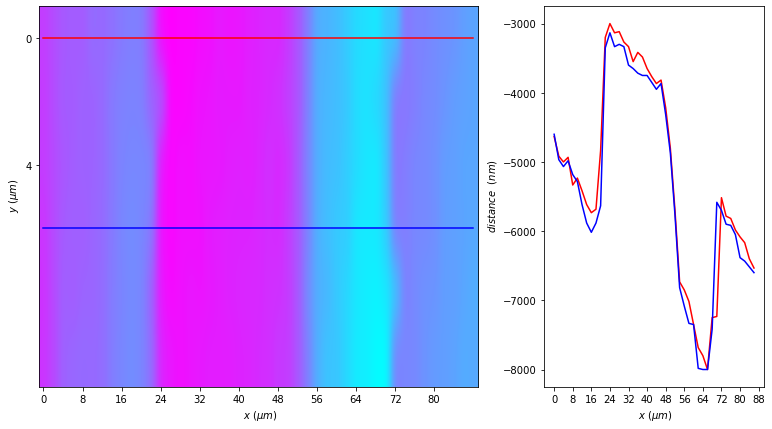

In [5]:
fig = plt.figure(figsize=(13, 7))
gs = GridSpec(1, 2, figure=fig,wspace=0.2,width_ratios=[2,1])
    
ax = fig.add_subplot(gs[0, 0])
ax2 =fig.add_subplot(gs[0, 1])
    
npix1=0
npix2=3
    
ax.set_xlabel(" $x$ $(\mu m)$")
ax.set_xticks(np.arange(0,44,4))
ax.set_xticklabels(np.arange(0,88,8))
ax.set_ylabel(" $y$ $(\mu m)$")
ax.set_yticks(np.arange(0,4,2))
ax.set_yticklabels(np.arange(0,8,4))
ax.imshow(-promafm,cmap='cool',aspect='auto',interpolation='gaussian')
ax.plot([0,44],[npix1,npix1],'r')
ax.plot([0,44],[npix2,npix2],'b')
    
ax2.set_xlabel(" $x$ $(\mu m)$")
ax2.set_xticks(np.arange(0,45,4))
ax2.set_xticklabels(np.arange(0,90,8))
ax2.set_ylabel(" $distance ~$ $(n m)$")

ax2.plot(-promafm.T[1:,npix1],'r')
ax2.plot(-promafm.T[1:,npix2],'b')
    
plt.show()

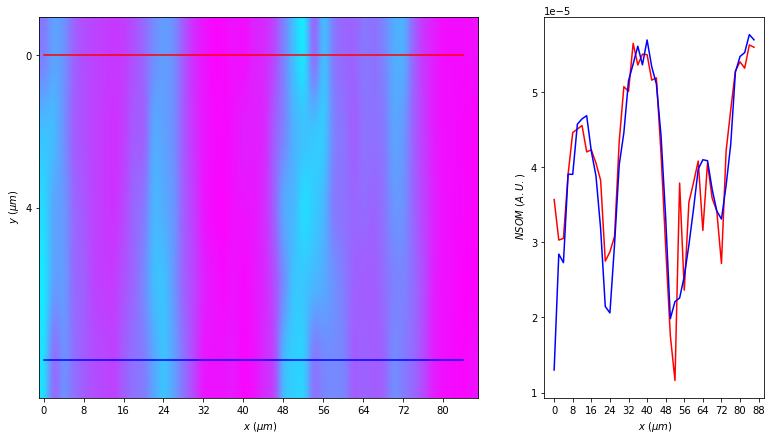

In [6]:
fig = plt.figure(figsize=(13, 7))
gs = GridSpec(1, 2, figure=fig,wspace=0.2,width_ratios=[2,1])
    
ax = fig.add_subplot(gs[0, 0])
ax2 =fig.add_subplot(gs[0, 1])
    
npix1=0
npix2=4
    
ax.set_xlabel(" $x$ $(\mu m)$")
ax.set_xticks(np.arange(0,44,4))
ax.set_xticklabels(np.arange(0,88,8))
ax.set_ylabel(" $y$ $(\mu m)$")
ax.set_yticks(np.arange(0,4,2))
ax.set_yticklabels(np.arange(0,8,4))
ax.imshow(promlockin[1:,1:],cmap='cool',aspect='auto',interpolation='gaussian')
ax.plot([0,42],[npix1,npix1],'r')
ax.plot([0,42],[npix2,npix2],'b')
    
ax2.set_xlabel(" $x$ $(\mu m)$")
ax2.set_xticks(np.arange(0,45,4))
ax2.set_xticklabels(np.arange(0,90,8))
ax2.set_ylabel(" $NSOM$ $(A.U.)$")

ax2.plot(promlockin.T[1:,npix1],'r')
ax2.plot(promlockin.T[1:,npix2],'b')
    
plt.show()

In [7]:
from scipy import interpolate
from scipy.optimize import curve_fit

In [8]:
def func(x,a,b):
    return a*x+b

def afmCorr(Arr):
    afmTest=np.zeros((Arr.shape[0],Arr.shape[1]))
    for i in np.arange(0,Arr.shape[0],1):
        line=Arr[i,:]
        x=np.arange(0,line.size)
        popt, pcov = curve_fit(func, x, line)
        
        linef=func(x,*popt)
        afmTest[i,:]=line-linef
    
    return afmTest

In [9]:
datafmCorr=afmCorr(promafm)

datafmCorr=datafmCorr-2000;

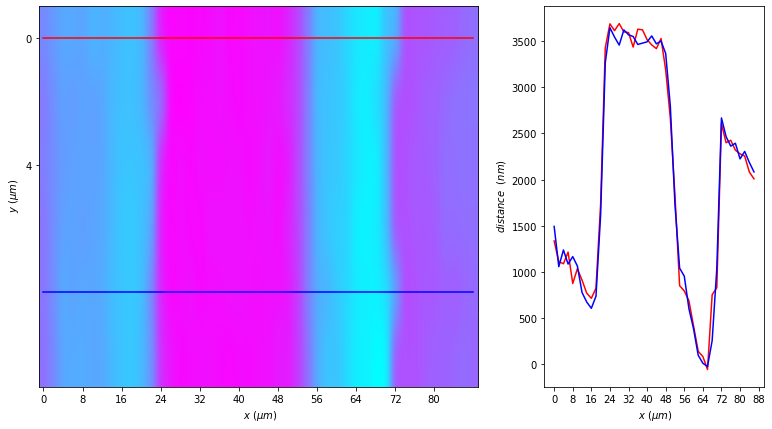

In [10]:
fig = plt.figure(figsize=(13, 7))
gs = GridSpec(1, 2, figure=fig,wspace=0.2,width_ratios=[2,1])
    
ax = fig.add_subplot(gs[0, 0])
ax2 =fig.add_subplot(gs[0, 1])
    
npix1=0
npix2=4
    
ax.set_xlabel(" $x$ $(\mu m)$")
ax.set_xticks(np.arange(0,44,4))
ax.set_xticklabels(np.arange(0,88,8))
ax.set_ylabel(" $y$ $(\mu m)$")
ax.set_yticks(np.arange(0,4,2))
ax.set_yticklabels(np.arange(0,8,4))
ax.imshow(-datafmCorr,cmap='cool',aspect='auto',interpolation='gaussian')
ax.plot([0,44],[npix1,npix1],'r')
ax.plot([0,44],[npix2,npix2],'b')
    
ax2.set_xlabel(" $x$ $(\mu m)$")
ax2.set_xticks(np.arange(0,45,4))
ax2.set_xticklabels(np.arange(0,90,8))
ax2.set_ylabel(" $distance ~$ $(n m)$")

ax2.plot(-datafmCorr.T[1:,npix1],'r')
ax2.plot(-datafmCorr.T[1:,npix2],'b')
    
plt.show()

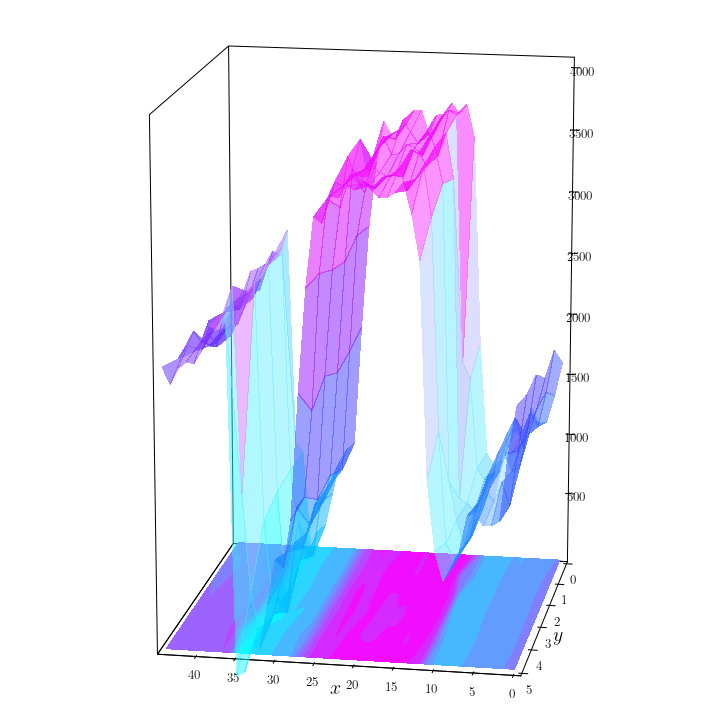

In [70]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
from matplotlib import gridspec
from matplotlib import cm
import matplotlib.animation
from mpl_toolkits.mplot3d import Axes3D 
import matplotlib.gridspec as gridspec
from mpl_interactions import interactive_plot,interactive_axhline,interactive_imshow,indexer,interactive_title
from lmfit import Model
import mpl_interactions.ipyplot as iplt
from scipy.signal import chirp, find_peaks, peak_widths
from IPython.display import display
from IPython.display import HTML
from IPython.display import clear_output
from matplotlib.colors import LightSource

#plt.rcParams['figure.dpi']= 100
plt.rcParams['text.usetex']  = True
plt.rcParams['font.family']  = 'serif'
plt.rcParams['axes.labelsize'] = 20
plt.rcParams['axes.titlesize'] = 18
plt.rcParams['lines.linewidth'] = 1
plt.rcParams['grid.linewidth'] = 1
plt.rcParams['savefig.pad_inches'] = 0
plt.rcParams['xtick.labelsize']     = 13
plt.rcParams['ytick.labelsize']     = 13
plt.rcParams['axes.linewidth']      = 1
plt.rcParams["xtick.minor.visible"] =  False
plt.rcParams["xtick.major.size"]    =  10
plt.rcParams["xtick.minor.size"]    =  5
plt.rcParams["xtick.major.width"]   =  1
plt.rcParams["xtick.minor.width"]   =  1
plt.rcParams["xtick.direction"]     =  'in'
plt.rcParams["ytick.minor.visible"] =  False
plt.rcParams["ytick.major.size"]    =  10
plt.rcParams["ytick.minor.size"]    =  5
plt.rcParams["ytick.major.width"]   =  1
plt.rcParams["ytick.minor.width"]   =  1
plt.rcParams["ytick.direction"]     =  'in'
plt.rcParams['legend.frameon']      = False

datafmCorr=afmCorr(promafm)

datafmCorr=datafmCorr-2000;
datafmCorr=-datafmCorr
xi=0;xf=datafmCorr.shape[1]
yi=0;yf=datafmCorr.shape[0]
nx, ny =datafmCorr.shape[1], datafmCorr.shape[0]
X, Y = np.meshgrid(np.arange(0, nx, 1), np.arange(0, ny, 1))
Z1   =  promafm[yi:yf,xi:xf]


fig = plt.figure(figsize=(10,10))
fig.subplots_adjust(left=0, bottom=0, right=1, top=1, wspace=0, hspace=0)

#fig.canvas.layout.width = '100%'
#fig.canvas.layout.height = '500px'
ax = plt.axes(projection='3d')
ax.force_zorder = True
ls = LightSource(270, 45)

rgb = ls.shade(Z1, cmap=cm.cool, vert_exag=1, blend_mode='soft')

surf=ax.plot_surface(X, Y,Z1,cmap=cm.cool,facecolors=rgb,
                       linewidth=0, antialiased=False,alpha=0.5 )
# ax.scatter(X,Y,Z1,c=cm.jet(Z1/Z1.max()),cmap="jet",s=20,lw=0.1,zorder=10)
ax.contourf(X,Y, Z1, zdir='z', offset=-50, cmap=cm.cool,alpha=1)
ax.grid(False)
ax.xaxis.pane.set_edgecolor('#000000')
ax.xaxis.pane.set_linewidth(1)
ax.yaxis.pane.set_edgecolor('#000000')
ax.yaxis.pane.set_linewidth(1)
ax.zaxis.pane.set_edgecolor('#000000')
ax.zaxis.pane.set_linewidth(1)

ax.xaxis.pane.set_alpha(1)
ax.yaxis.pane.set_alpha(1)
ax.zaxis.pane.set_alpha(1)

ax.xaxis.pane.fill = False
ax.yaxis.pane.fill = False
ax.zaxis.pane.fill = False
#ax.set_zticks([])
ax.set_xlabel(r'$x$',labelpad=-7,loc='center')
ax.set_ylabel(r'$y$',labelpad=-7,loc='center')
ax.tick_params(axis='both',which='both',pad=0)
# ax.set_yticks(ylbs)
# ax.set_xticks(xlbs)
# ax.set_xticklabels(xlbs,rotation=0 ,va='bottom',ha='center')
# ax.set_yticklabels(ylbs,rotation=0 ,va='bottom',ha='center')
ax.set_xlim(0,44)
ax.set_ylim(0,5)
ax.set_zlim(5,4000)
ax.set_box_aspect([1,1,1.5])
ax.view_init(azim=100,elev=15)


plt.show()

In [12]:
xi=0;xf=datafmCorr.shape[1]
yi=0;yf=datafmCorr.shape[0]
nx, ny = datafmCorr.shape[1], promlockin.shape[0]
X, Y = np.meshgrid(np.arange(0, nx, 1), np.arange(0, ny, 1))
Z1   =  -datafmCorr[yi:yf,xi:xf]

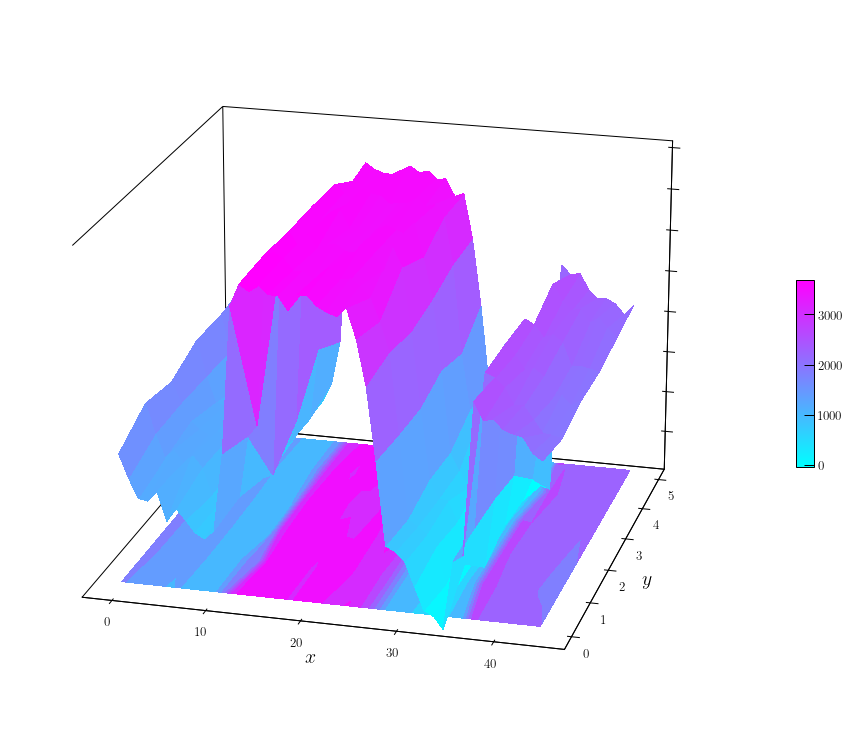

In [13]:
fig = plt.figure(figsize=(13,13))
fig.subplots_adjust(left=0, bottom=0, right=1, top=1, wspace=0, hspace=0)

#fig.canvas.layout.width = '100%'
#fig.canvas.layout.height = '500px'
ax = plt.axes(projection='3d')
surf=ax.plot_surface(X, Y,Z1,cmap=cm.cool, linewidth=1, antialiased=False)
ax.grid(False)

ax.xaxis.pane.set_edgecolor('#000000')
ax.xaxis.pane.set_linewidth(1)
ax.yaxis.pane.set_edgecolor('#000000')
ax.yaxis.pane.set_linewidth(1)
ax.zaxis.pane.set_edgecolor('#000000')
ax.zaxis.pane.set_linewidth(1)

ax.xaxis.pane.set_alpha(1)
ax.yaxis.pane.set_alpha(1)
ax.zaxis.pane.set_alpha(1)

ax.xaxis.pane.fill = False
ax.yaxis.pane.fill = False
ax.zaxis.pane.fill = False

ax.set_zticklabels([])
ax.set_xlabel(r'$x$')
ax.set_ylabel(r'$y$')
ax.view_init(azim=-75,elev=20)

ax.contourf(X, Y,Z1,zdir='z',cmap=cm.cool,offset=100)
#ax.set_xlim(0,45)
#ax.set_ylim(0,7)

ax.set_zlim(100,4000)

fig.colorbar(surf, shrink=0.2, aspect=10)

plt.show()

In [14]:
leng=Z1.size
np.zeros((leng,3));
zr=np.reshape(Z1,(leng,1)); yr=np.reshape(Y,(leng,1)); xr=np.reshape(X,(leng,1));

ttest=np.vstack((2.0*xr.T,2.0*yr.T,zr.T))

armdat=ttest.T



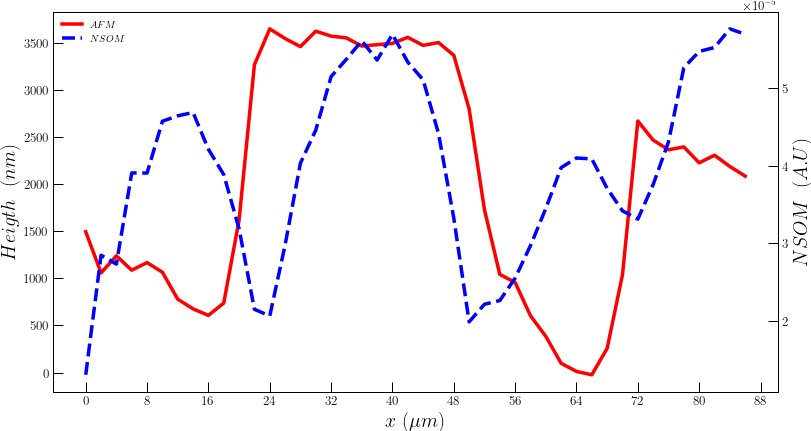

In [15]:
n=4

fig = plt.figure(figsize=(13, 7))

ax=fig.add_subplot()
ax.set_xlabel(" $x$ $(\mu m)$")
ax.set_xticks(np.arange(0,45,4))
ax.set_xticklabels(np.arange(0,90,8))
ax.set_ylabel(" $Heigth ~$ $(n m)$")
l1, =ax.plot(-datafmCorr.T[1:,n],color='r',ls='-', lw=3.5)

ax2=ax.twinx()
ax2.set_ylabel(" $NSOM ~$ $(A.U)$")
l2, =ax2.plot(abs(promlockin.T[1:,n]),color='b', ls='--', lw=3.5)

plt.legend([l1, l2], ["$AFM$", "$NSOM$"])

plt.show()

In [16]:
ddaf=-datafmCorr.T[1:,n]; ddsn=promlockin.T[1:,n]
datx=np.arange(0,2*ddaf.size,2)
armdat=np.vstack((datx,ddaf,ddsn))
armdat.shape

(3, 44)

In [17]:
path='//media/labfiles/nsom/repos/lab-posters/2022-posters/sfm-poster-iico/report-nano/figures/result/compProf/'
name='compafmnsom.dat'
Pcomp=path+name

In [18]:
np.savetxt(Pcomp,armdat)

PermissionError: [Errno 13] Permission denied: '//media/labfiles/nsom/repos/lab-posters/2022-posters/sfm-poster-iico/report-nano/figures/result/compProf/compafmnsom.dat'

## 1 micro step

In [ ]:
dat4=exp.data[7][0][:,:].T
datlockin4=dat4[1]; datafm4=dat4[0]

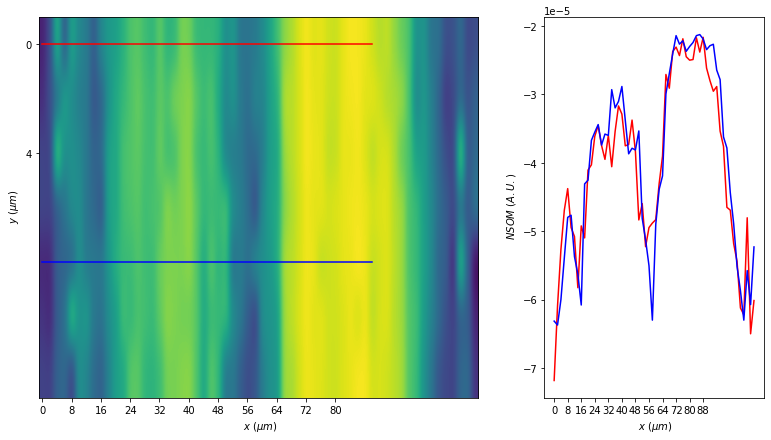

In [ ]:
fig = plt.figure(figsize=(13, 7))
gs = GridSpec(1, 2, figure=fig,wspace=0.2,width_ratios=[2,1])
    
ax = fig.add_subplot(gs[0, 0])
ax2 =fig.add_subplot(gs[0, 1])
    
npix1=0
npix2=4
    
ax.set_xlabel(" $x$ $(\mu m)$")
ax.set_xticks(np.arange(0,44,4))
ax.set_xticklabels(np.arange(0,88,8))
ax.set_ylabel(" $y$ $(\mu m)$")
ax.set_yticks(np.arange(0,4,2))
ax.set_yticklabels(np.arange(0,8,4))
ax.imshow(datlockin4[1:,1:],cmap='viridis',aspect='auto',interpolation='gaussian')
ax.plot([0,45],[npix1,npix1],'r')
ax.plot([0,45],[npix2,npix2],'b')
    
ax2.set_xlabel(" $x$ $(\mu m)$")
ax2.set_xticks(np.arange(0,45,4))
ax2.set_xticklabels(np.arange(0,90,8))
ax2.set_ylabel(" $NSOM$ $(A.U.)$")

ax2.plot(datlockin4.T[1:,npix1],'r')
ax2.plot(datlockin4.T[1:,npix2],'b')
    
plt.show()